The main objective is to perform the classification of Occupancy Detection data (contains attributes Temperature(Celsius), Relative humidity(%), Light(Lux), co2(ppm), Humidity Ratio(kgwater-vapor/kg-air) and occupancy status(0 or 1)) using supervised learning model of Support Vector Machine.
Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00357/
Python version : 2.7.13 |Anaconda custom (64-bit)|

Import the libraries.

In [55]:
import numpy as np
import pylab as pl
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn import svm, datasets

Load the data from the dataset present in the local system.

In [56]:
mydata = np.loadtxt('D:\\Project\\dataset.txt',usecols=(0,1,2,3,4,5) ,delimiter=',')


For each instance in 'mydata' we have a target class(Occupancy status-0 or 1, where 0 for not occupied and 1 for occupied). Seperate the data as features(X) and target(Y).

In [57]:
X = mydata[:,0:4]
Y= mydata[:,5]

Find the shape of features data to get the size of the matrix.

In [58]:
n_instances, n_features = X.data.shape

In [59]:
print(X.shape)

(9751, 4)


So, the dataset contains 9751 records or instances. Now, Partition the data(both features and target) in to two parts: 1)train, 2)test. 

In [60]:
train_size = 6000
X_train = X[:train_size]
Y_train = Y[:train_size]
X_test = X[train_size:]
Y_test = Y[train_size:]

In [61]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(6000, 4) (3751, 4)
(6000,) (3751,)


Now, shuffle the train data of features using random.shuffle method.

In [62]:
np.random.shuffle(X_train)

Apply the Support Vector Machine learning model with linear kernel on the training data and find the accuracy of the test data.

In [63]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, Y_train)
print("Accuracy of SVM having Linear kernel: ", svc.score(X_test, Y_test))

Accuracy of SVM having Linear kernel:  0.707544654759


Predict the testing data using the SVM model.

In [64]:
Y_predict_test = svc.predict(X_test)
print(Y_predict_test)

[ 0.  0.  0. ...,  0.  0.  0.]


Plot the SVM model having linear kernel and find the number of support vectors of the model.

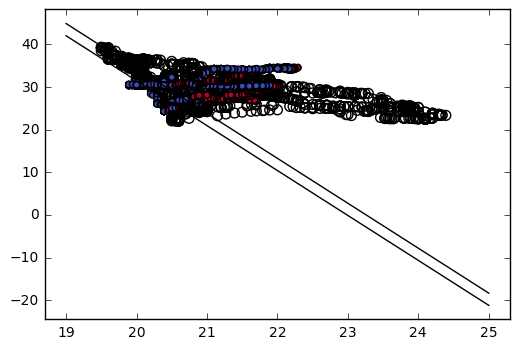

Number of support vectors:  1855


In [65]:
w= svc.coef_[0]
a= -w[0]/w[1]
XX = np.linspace(19,25)
YY = np.linspace(0,100)
Yz = a*XX - (svc.intercept_[0])/w[1]
b= svc.support_vectors_[0]
YY_down = a*XX+(b[1]-a*b[0])
b = svc.support_vectors_[-1] 
YY_up = a*XX+(b[1]-a*b[0])
plt.plot(XX,YY_down, 'k-')
plt.plot(XX,YY_up, 'k-')
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=50, facecolors ='none',cmap='spring')
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test, cmap= plt.cm.coolwarm)
plt.axis('tight')
plt.show()
print('Number of support vectors: ', svc.support_.size)

Now, apply the data on Support Vector Machine using RadialBasisFunction('rbf') kernel:

In [66]:
svc_rbf = svm.SVC(C=1.0, gamma=0.8, kernel='rbf')
svc_rbf.fit(X_train, Y_train)
print("Accuracy of SVM having RBF kernel: ", svc_rbf.score(X_test, Y_test))

Accuracy of SVM having RBF kernel:  0.706211676886


Predict the testing data using SVM model.

In [67]:
y_predict_test_rbf = svc_rbf.predict(X_test)
print(y_predict_test_rbf)

[ 1.  0.  1. ...,  0.  0.  0.]


Now, apply the data on Linear Support Vector Machine:

In [68]:
linear_svc = svm.LinearSVC(C=1.0)
linear_svc.fit(X_train, Y_train)
print("Accuracy of Linear Support Vector Machine model is:", linear_svc.score(X_test, Y_test))

Accuracy of Linear Support Vector Machine model is: 0.707544654759


Predict the testing data using SVM model.

In [69]:
y_predict_test_rbf = linear_svc.predict(X_test)
print(y_predict_test_rbf)

[ 0.  0.  0. ...,  0.  0.  0.]
